<a href="https://colab.research.google.com/github/alik604/eminem_lyrics_generator/blob/master/eminem_lyrics_generator_LSTM_%26_HMM_Alik604.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# By Alik604
## Adapted from https://github.com/rojagtap/eminem_lyrics_generator
> 

In [192]:
# from google.colab import drive
# drive.mount('/content/drive')
# cd /content/drive/My Drive/Data

In [257]:
!pip install hmmlearn pomegranate

import pandas as pd
import numpy as np
import re
import os
import glob
import json
import requests
import codecs


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

     |████████████████████████████████| 368kB 12.4MB/s 
     |████████████████████████████████| 12.6MB 12.6MB/s 


In [ ]:
def clean_text(sentence):
  sentence = sentence.lower()
  sentence = re.sub(r'\[.*?\]', "", sentence) # https://www.regextester.com/97589 &  https://stackoverflow.com/a/40621332
  sentence = re.sub(r'\[0-9]', "", sentence)

  sentence = re.sub(r"\u2005", "", sentence)

  sentence = re.sub(r"’", "\'", sentence) 
  sentence = re.sub(r"‘", "\'", sentence)
  sentence = re.sub(r"”", "\'", sentence) 
  sentence = re.sub(r"“", "\'", sentence)

  sentence = re.sub(r"i'm", "i am", sentence)
  sentence = re.sub(r"he's", "he is", sentence)
  sentence = re.sub(r"she's", "she is", sentence)
  sentence = re.sub(r"it's", "it is", sentence)
  sentence = re.sub(r"that's", "that is", sentence)
  sentence = re.sub(r"what's", "what is", sentence)
  sentence = re.sub(r"where's", "where is", sentence)
  sentence = re.sub(r"there's", "there is", sentence)
  sentence = re.sub(r"who's", "who is", sentence)
  sentence = re.sub(r"how's", "how is", sentence)
  sentence = re.sub(r"\'ll", " will", sentence)
  sentence = re.sub(r"\'ve", " have", sentence)
  sentence = re.sub(r"\'re", " are", sentence)
  sentence = re.sub(r"\'d", " would", sentence)
  sentence = re.sub(r"won't", "will not", sentence)
  sentence = re.sub(r"can't", "cannot", sentence)
  sentence = re.sub(r"n't", " not", sentence)
  sentence = re.sub(r"n'", "ng", sentence)
  sentence = re.sub(r"\'bout", "about", sentence)
  sentence = re.sub(r"'til", "until", sentence)
  sentence = re.sub(r"c'mon", "come on", sentence)
  sentence = re.sub("\n", " ", sentence)

  sentence = re.sub(r"\u2005", "", sentence)
  sentence = re.sub("[-*/()\"’‘'#/@;:<>{}`+=~|!?,]", "", sentence) # should it be:  \'   rather than '   # TODO note: removed . 
  sentence = re.sub(r"'", "", sentence)
  sentence = re.sub(r"\t", "", sentence)
  sentence = re.sub(r"\r", "", sentence)
  sentence = re.sub(r"\n", "", sentence)

  sentence = re.sub(r"  ", " ", sentence)
  sentence = re.sub(r"  ", " ", sentence)
  sentence = re.sub(r"  ", " ", sentence)

  return sentence

# Starting Preprocessing - Check point
> This can be disreguarded as data is provided a single .csv

In [194]:
## retain

# !pip install lyricsgenius
# import lyricsgenius
# genius = lyricsgenius.Genius("8AO32_nfbxk_8yNyBYJTnw_4qRjT2Uid1pMSW_XJ_56sBsnNLuXeKxwMMEZmQrQN") # this is a valid key :) 
# artist = genius.search_artist("Eminem", max_songs=100, sort='popularity') # XXXTENTACION 
# for i in range(100):
#   artist.songs[i].save_lyrics()

In [195]:
# lines = []
# i = 1
# for root, dirs, files in os.walk('./raw'):
#     for file in files:
#         if file.endswith('.json') and 'xxxtentacion' in file : # eminem  # xxxtentacion
#             file = open("./raw/" + file)
#             json_data = file.read()
#             data = json.loads(json_data)
#             lines.append(data['lyrics'])
#             i +=1
# print(i)
# lines = list(filter(None, lines))
# # lines


# lines = pd.DataFrame(lines, columns=['lines'])
# lines.lines = lines.lines.apply(lambda line: clean_text(line))
# lines.values

# lines.to_csv('./preprocessed_data_xxxtentacion.csv')

# Starting ML - Check point

In [227]:
## More books http://www.glozman.com/textpages.html


## Eminem
lines = pd.read_csv('https://github.com/alik604/eminem_lyrics_generator/raw/master/data/preprocessed_data_eminem.csv',index_col=0)

## XXXTentacion
# lines = pd.read_csv('https://raw.githubusercontent.com/alik604/eminem_lyrics_generator/master/data/preprocessed_data_xxxtentacion.csv',index_col=0)

## Treasure Island
# raw_text_lower = requests.get("https://data.heatonresearch.com/data/t81-558/text/treasure_island.txt").text.lower()
# processed_text = re.sub(r'[^\x00-\x7f]',r'', raw_text_lower)
# processed_text = clean_text(processed_text)
# # processed_text
# lines = pd.DataFrame(processed_text.split(".")[270:], columns=["lines"])
# print(lines.shape)
# lines.drop_duplicates(inplace=True)
# print(lines.shape)


## Harry Potter books 

# !git clone https://github.com/formcept/whiteboard.git
# # !ls whiteboard/nbviewer/notebooks/data/harrypotter

# DIR = "whiteboard/nbviewer/notebooks/data/harrypotter"

# temp = ""
# t = ""
# chars = []
# for book in os.listdir(DIR):
#     print("Reading ", book)
#     with codecs.open(DIR + '/' + book, "rb", "utf-8") as infile:
#         temp += infile.read()
#         chars.append(len(temp))
#         print("Characters read so far " + str(len(temp)))

# processed_text = temp
# processed_text = processed_text.replace('Harry Potter and the Philosophers Stone - J.K. Rowling', '')
# processed_text = processed_text.replace('Harry Potter and the Chamber of Secrets - J.K. Rowling ', '')
# processed_text = processed_text.replace('Harry Potter and the Prisoner of Azkaban - J.K. Rowling ', '')
# processed_text = processed_text.replace('Harry Potter and the Goblet of Fire - J.K. Rowling ', '')
# processed_text = processed_text.replace('Harry Potter and the Order of the Phoenix -J.K. Rowling', '')
# processed_text = processed_text.replace('Harry Potter and the Half Blood Prince - J.K. Rowling', '')
# processed_text = processed_text.replace('Harry Potter and the Deathly Hallows - J.K. Rowling', '')
# processed_text = processed_text.replace('\nJ ', '').replace(' K ', '').replace(' R O W L ! N G \n\nHARRY \n\nPOTTER', '').replace('Rowling', '')#.replace('Harry Potter and the', '')# .replace('Page | ', '')  
# processed_text = clean_text(processed_text)
# print(len(temp), ' char count to: ', len(processed_text))

# lines = pd.DataFrame(processed_text.split("page"), columns=["lines"])
# print('pre drop_duplicates', lines.shape)
# lines = lines.apply(lambda x: x.str.strip()) 
# lines.drop_duplicates(inplace=True)
# print('post drop_duplicates', lines.shape)


lines.head(10).values

array([[' look i was gonna go easy on you not to hurt your feelings but i am only going to get this one chance six minutes— six minutes— somethings wrong i can feel it six minutes slim shady you are on just a feeling i have got like somethings about to happen but i do not know what\xa0 if that means what i think it means we are in trouble big trouble\xa0 and if he is as bananas as you say i am not taking any chances you are just what the doc ordered i am beginning to feel like a rap god rap god all my people from the front to the back nod back nod now who thinks their arms are long enough to slap box slap box they said i rap like a robot so call me rapbot but for me to rap like a computer it must be in my genes i got a laptop in my back pocket my pen will go off when i halfcock it got a fat knot from that rap profit made a living and a killing off it ever since bill clinton was still in office with monica lewinsky feeling on his nutsack i am an mc still as honest but as rude and as ind

In [228]:
x_train = [line[:-1] for line in lines.lines]
y_train = [line[1:] for line in lines.lines]

In [229]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [230]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines.lines)

In [231]:
# print(x_train[0])
x_train = tokenizer.texts_to_sequences(x_train)
y_train = tokenizer.texts_to_sequences(y_train)
# print(x_train[0])

In [232]:
word2idx = tokenizer.word_index
idx2word = {value: key for key, value in word2idx.items()}

word2idx["<pad>"] = 0
idx2word[0] = "<pad>"

In [233]:
lengths = [len(sequence) for sequence in x_train]

lengths = pd.Series(lengths)
lengths.describe()

count      84.000000
mean      968.904762
std       267.029470
min       114.000000
25%       800.750000
50%       920.000000
75%      1077.750000
max      1785.000000
dtype: float64

In [234]:
# max(map(len, x_train))

# On to the Deep Learning

In [235]:
maxlen = 256 # lengths.describe()['max'] # None to Infer it 
# maxlen: Optional Int, maximum length of all sequences. If not provided, sequences will be padded to the length of the longest individual sequence
x_train = pad_sequences(x_train, maxlen=int(maxlen), padding='pre', truncating='pre') # prehaps pre is ideal: https://stackoverflow.com/a/51825971
y_train = pad_sequences(y_train, maxlen=int(maxlen), padding='pre', truncating='pre')

In [236]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import GRU, LSTM, Dense, Input, Embedding, Dropout, Bidirectional
from tensorflow.keras.layers import * 

from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, LambdaCallback
import gc
gc.collect()


import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

87474

Num GPUs Available:  1


In [237]:
def generate(word):
    # word = clean_text(word)
    inputs = np.zeros((1, 1))
    inputs[0, 0] = word2idx[word]
    count = 1
    while count <= 50:
        pred = model.predict(inputs)
        word = np.argmax(pred)
        if word >= vocab_size:
            word = vocab_size - 1

        inputs[0, 0] = word
        
        print(idx2word[word], end=" ")
        count += 1

def on_epoch_end(epoch, _):
    word = "life"
    generate(word)
    print()


In [251]:
vocab_size = len(tokenizer.word_index) + 1 # 8526 for eminem; ~2000 for X
embedding_dim = 512 #1024 # 128
bridge = int(vocab_size/3)

model = Sequential()

model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, mask_zero=True)) # (batch_size, input_length) - > (batch_size, input_length, output_dim) 
model.add((Bidirectional(LSTM(embedding_dim, return_sequences=True, recurrent_regularizer=l2(0.01)))))

model.add(GaussianNoise(0.2))
# model.add(Dropout(0.6))

# model.add(Dense(embedding_dim)) # I found this to work well in LSTMs for regression
# model.add(Bidirectional(LSTM(embedding_dim, return_sequences=True)))

model.add(Dense(vocab_size))

opt = SGD(0.01) 
# Adam(0.001) is default
# SGD(0.01) is default
best = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

model.compile(optimizer=opt, loss=SparseCategoricalCrossentropy(from_logits=True)) # normally, I would have this set to false, and have my output layer have h <- sigmoid; were h is the activation function

# model.summary()

In [252]:
# y_train.shape
history = model.fit(x_train, y_train, epochs=3, batch_size=256, verbose=1, callbacks=[best, print_callback], validation_split=0.1).history

Epoch 1/3
1/1 [==============================] - ETA: 0s - loss: 19.2948WARNING:tensorflow:5 out of the last 13 calls to <function Model.make_test_function.<locals>.test_function at 0x7f398a820950> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
entrance selfempower swept trigger territory discriminated fresher svengali playful sever moved weight back growth grandmas we industry walls plus winter globetrotter benzo blu

In [253]:
# model.save("model_BiLstm_Harry_potter.h5")
#model = load_model("model.h5")

In [254]:
generate("the")

hug eazy pleading interventionist grrr sales agatha pipe dockers bosses busy woah colorado woods strangling freedom shiv writing imaginable use leap make employee pentup ignored disrespectful imitations crist doubledup mcdonalds aaaghh epitome skrilla mo– 300 iller interscope swedish carry estranged stagnant fear far near mouth doing break schottenheimer housewife muscular 

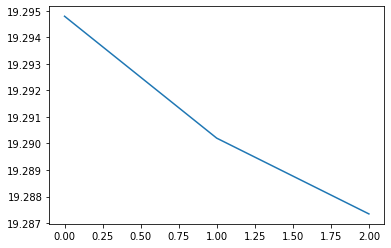

In [255]:
import matplotlib.pyplot as plt

plt.plot(range(len(history['loss'])), history['loss'])

## Try A Hidden Markov Model

In [258]:
from hmmlearn.hmm import MultinomialHMM
print(len(tokenizer.word_index)) # vocab size? 
x_train.shape

8524


(84, 256)

In [259]:
hmm = MultinomialHMM(n_components=10, n_iter = 100) # covariance_type="full"
hmm.fit(x_train)

Fitting a model with 85329 free scalar parameters with only 21504 data points will result in a degenerate solution.


MultinomialHMM(algorithm='viterbi', init_params='ste', n_components=10,
               n_iter=100, params='ste',
               random_state=RandomState(MT19937) at 0x7F3AA76F7888,
               startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
               verbose=False)

In [260]:
generated, y  = hmm.sample(20)  # np.array([1,2,3]).reshape(-1, 1)
generated = generated.flatten()
print(generated)

for pred in generated:
  print(idx2word[pred], end =' ')

[   8    7   53  115  116   27    6 1219   77   36   72   14    6   12
   77  114  132  206   11  210]
is it em better only up and ran too when about that and my too day everybody really me die 

### Train on 1D representation

In [261]:
print(x_train.shape)
print(x_train.flatten().shape)

hmm = MultinomialHMM(n_components=10, n_iter = 300) # covariance_type="full"
hmm.fit(x_train.flatten().reshape(-1, 1)) # max: 60000

Fitting a model with 85329 free scalar parameters with only 21504 data points will result in a degenerate solution.


(84, 256)
(21504,)


MultinomialHMM(algorithm='viterbi', init_params='ste', n_components=10,
               n_iter=300, params='ste',
               random_state=RandomState(MT19937) at 0x7F3AA76F7888,
               startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
               verbose=False)

In [262]:
generated, y = hmm.sample(20)  # np.array([1,2,3]).reshape(-1, 1)
generated = generated.flatten()
print(generated)
for pred in generated:
  print(idx2word[pred], end =' ')

[   8  223   17  132    9   20  717 2907   17   86   28   10   54    1
   50   66    1    9    4 8419]
is play like everybody am on motherfuckers mockingbird like there get not would i can or i am to dracula 

## Try the package [Pomegranate](https://pomegranate.readthedocs.io/en/latest/)

In [263]:
from pomegranate import *

data_sample = x_train[:10]
data_sample.shape

(10, 256)

In [ ]:
model = MarkovNetwork.from_samples(data_sample, n_jobs = 3)

In [ ]:
# model = BayesianNetwork.from_samples(data_sample, n_jobs = 3)


In [ ]:
model.predict(data_sample)

[-1, -1]

In [ ]:
# MultivariateGaussianDistribution will cause crash. may data is the worng shape
# model = HiddenMarkovModel.from_samples(distribution = TODO, X= data_sample, n_components = 5, max_iterations=1)
# model.bake()
# model.fit(data_sample)


#### Debuging 